Punto 1 

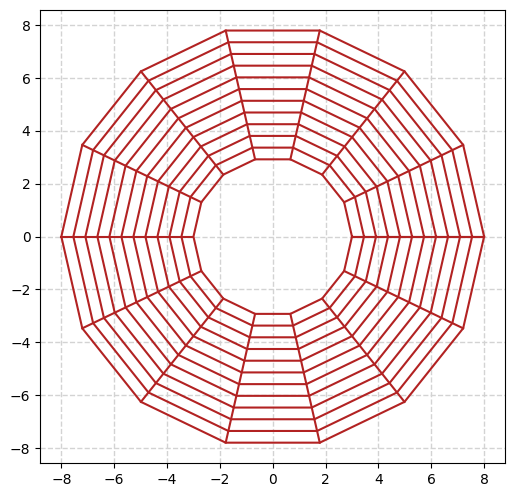

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
nth = 15
nr = 12
r_inf = 3
r_sup = 8

t_dis = np.linspace(0, (2*np.pi), nth)           #Discretizacion de los Angulos
r_dis = np.linspace(r_inf, r_sup, nr)           #Discretizacion de los radios

th, r = np.meshgrid(t_dis, r_dis)            #Malla

x_s = r * np.cos(th)                         #Convercion a carteciano (grafica)
y_s = r* np.sin(th)                         #Convercion a carteciano (grafica)



#-------------------------------------------------------------------------------Grafica-------------------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(6, 6))

for i in range(nr):
    ax.plot(x_s[i], y_s[i], color='firebrick')

for j in range(nth):
    ax.plot(x_s[:, j], y_s[:, j], color='firebrick')
ax.set_aspect('equal')  
ax.grid(color='lightgray', linestyle='--', linewidth=1)
plt.show()

Punto 2

Delta X: 0.8421052631578947
Delta Y: 0.8421052631578947 

------------------------------------------------------------
Seccion de pruebas

Puntos [(-8.0, -2.947368421052632), (-8.0, -2.105263157894737), (-8.0, -1.2631578947368425), (-8.0, -0.4210526315789478), (-8.0, 0.4210526315789469), (-8.0, 1.2631578947368425), (-8.0, 2.1052631578947363), (-8.0, 2.94736842105263), (-7.157894736842105, -4.631578947368421), (-7.157894736842105, -3.7894736842105265), (-7.157894736842105, -2.947368421052632), (-7.157894736842105, -2.105263157894737), (-7.157894736842105, -1.2631578947368425), (-7.157894736842105, -0.4210526315789478), (-7.157894736842105, 0.4210526315789469), (-7.157894736842105, 1.2631578947368425), (-7.157894736842105, 2.1052631578947363), (-7.157894736842105, 2.94736842105263), (-7.157894736842105, 3.7894736842105257), (-7.157894736842105, 4.631578947368421), (-6.315789473684211, -5.473684210526316), (-6.315789473684211, -4.631578947368421), (-6.315789473684211, -3.7894736842105265)

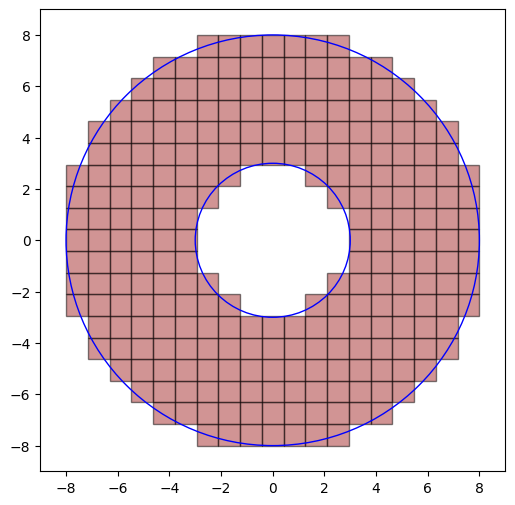

In [68]:
from collections import OrderedDict
import meshio 
nx =20
ny = 20

r_inf = 3
r_sup = 8

x_new = []
y_new = []
elemento = []
P_totales = []

puntos = []
puntos2 = []

x_dis = np.linspace(-r_sup, r_sup, nx)           #Discretizacion del eje X
y_dis = np.linspace(-r_sup, r_sup, ny)           #Discretizacion del eje Y 
delx = np.abs(x_dis[0] - x_dis[1])               #Paso de x
dely = np.abs(y_dis[0] - y_dis[1])               #paso de y 

print('Delta X:',delx)
print(f'Delta Y: {dely} \n')



for i in range(ny):
    for j in range(nx):
        P_totales.append([x_dis[j], y_dis[i]])


for i in range(len(P_totales)-nx-1):
    if ( (i+1)%(nx) != 0 and r_inf<=np.sqrt((((P_totales[i][0]+P_totales[i+1][0])/2)**2) + (((P_totales[i][1] + P_totales[i+nx][1])/2)**2))<=r_sup):
        
        A = [P_totales[i][0], P_totales[i][1]]
        B = [P_totales[i+1][0], P_totales[i+1][1]]
        C = [P_totales[i+1+nx][0], P_totales[i+1+nx][1]]
        D = [P_totales[i+nx][0], P_totales[i+nx][1]]
        elemento.append([A,B,C,D])
        puntos.extend([A,B,C,D])
puntos = list(OrderedDict.fromkeys(map(tuple, puntos)))
puntos.sort()



 

print('------------------------------------------------------------')
print('Seccion de pruebas\n')

print('Puntos', puntos)
print('segundo elemento',elemento[1])

print('\n------------------------------------------------------------')



#-------------------------------------------------------------------------------Grafica-------------------------------------------------------------------------------------------
fig2, ax2 = plt.subplots(figsize=(6, 6))
circle_inf = plt.Circle((0, 0), r_inf, color='blue', fill=False)
circle_sup = plt.Circle((0, 0), r_sup, color='blue', fill=False)

for element in elemento:
    square = Polygon(element, edgecolor='black', facecolor='brown', alpha=0.5)
    plt.gca().add_patch(square)


ax2.set_xlim(-r_sup - 1, r_sup + 1)
ax2.set_ylim(-r_sup - 1, r_sup + 1)
ax2.add_artist(circle_inf)
ax2.add_artist(circle_sup)
ax2.grid(color='lightgray', linestyle='none', linewidth=1)  
plt.show()


Punto 2 Bonus (Malla)

Delta X: 0.8421052631578947
Delta Y: 0.8421052631578947 

------------------------------------------------------------
Seccion de pruebas

Puntos [(-7.157894736842105, -2.947368421052632), (-7.157894736842105, -2.105263157894737), (-7.157894736842105, -1.2631578947368425), (-7.157894736842105, -0.4210526315789478), (-7.157894736842105, 0.4210526315789469), (-7.157894736842105, 1.2631578947368425), (-7.157894736842105, 2.1052631578947363), (-7.157894736842105, 2.94736842105263), (-6.315789473684211, -4.631578947368421), (-6.315789473684211, -3.7894736842105265), (-6.315789473684211, -2.947368421052632), (-6.315789473684211, -2.105263157894737), (-6.315789473684211, -1.2631578947368425), (-6.315789473684211, -0.4210526315789478), (-6.315789473684211, 0.4210526315789469), (-6.315789473684211, 1.2631578947368425), (-6.315789473684211, 2.1052631578947363), (-6.315789473684211, 2.94736842105263), (-6.315789473684211, 3.7894736842105257), (-6.315789473684211, 4.631578947368421), (-5.473684210

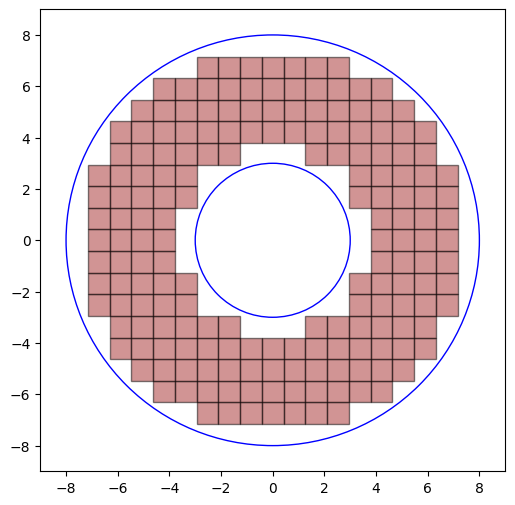

In [74]:
from collections import OrderedDict
import meshio 
nx =20
ny = 20
p = 4                                           #puntos dentro de los limites 1<p<4



r_inf = 3
r_sup = 8

x_new = []
y_new = []
elemento = []
P_totales = []

puntos = []

x_dis = np.linspace(-r_sup, r_sup, nx)           #Discretizacion del eje X
y_dis = np.linspace(-r_sup, r_sup, ny)           #Discretizacion del eje Y 
delx = np.abs(x_dis[0] - x_dis[1])               #Paso de x
dely = np.abs(y_dis[0] - y_dis[1])               #paso de y 

print('Delta X:',delx)
print(f'Delta Y: {dely} \n')

for i in range(ny):
    for j in range(nx):
        P_totales.append([x_dis[j], y_dis[i]])


for i in range(len(P_totales)-nx-1):

    A = [P_totales[i][0], P_totales[i][1]]
    B = [P_totales[i+1][0], P_totales[i+1][1]]
    C = [P_totales[i+1+nx][0], P_totales[i+1+nx][1]]
    D = [P_totales[i+nx][0], P_totales[i+nx][1]]
    filtro = [A, B, C, D]

    # Contador para contar cuántos puntos cumplen la condición
    puntos_cumplen = sum(1 for punto in filtro if punto[0]**2 + punto[1]**2 >= r_inf ** 2 and punto[0] ** 2 + punto[1] ** 2 <= r_sup ** 2)

    # Si al menos dos puntos cumplen la condición, se añade el elemento
    if (i+1)%(nx) != 0 and puntos_cumplen >= p:
        elemento.append([A, B, C, D])
        puntos.extend([A, B, C, D])

puntos = list(OrderedDict.fromkeys(map(tuple, puntos)))
puntos.sort()



 

print('------------------------------------------------------------')
print('Seccion de pruebas\n')

print('Puntos', puntos)
print('segundo elemento',elemento)

print('\n------------------------------------------------------------')



#-------------------------------------------------------------------------------Grafica-------------------------------------------------------------------------------------------
fig3, ax3 = plt.subplots(figsize=(6, 6))
circle_inf = plt.Circle((0, 0), r_inf, color='blue', fill=False)
circle_sup = plt.Circle((0, 0), r_sup, color='blue', fill=False)

for element in elemento:
    square = Polygon(element, edgecolor='black', facecolor='brown', alpha=0.5)
    plt.gca().add_patch(square)


ax3.set_xlim(-r_sup - 1, r_sup + 1)
ax3.set_ylim(-r_sup - 1, r_sup + 1)
ax3.add_artist(circle_inf)
ax3.add_artist(circle_sup)
ax3.grid(color='lightgray', linestyle='none', linewidth=1)  
plt.show()
